#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 4


### Name: Bozhou Yan


### Due: Nov. 18, 2019


## Goal:  The goal of this homework is to practice implementing Gaussian Discriminant generative model as well as to explore connections between Bayesian inference and regularization in linear regression.

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

## 1. Gaussian Discriminant Analysis

Here we return to the breast cancer dataset. We will use Gaussian discriminant analysis to classify tumors as either malignant or benign.  

### Part (a)
Implement the 3 methods in the following class.  You may wish to refer to the following Scipy documentation for [multivariate_normal](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html).

In [2]:
class GDA:
    
    """
    Create an instance of a Gaussian discriminant model.
    """
    def __init__(self, train_feat, train_targ):
        assert train_feat.shape[0] == train_targ.shape[0]
        self.N_train = train_feat.shape[0] # The number of training points.
        self.d = train_feat.shape[1] # The dimension of the data.
        self.train_feat = train_feat # Training features.
        self.train_targ = train_targ # Training labels (either 0 or 1).
    
    """
    Learn the parameters for the mean and covariance of the two classes.  Sets the parameters of the Gaussian
    Discriminant model.
    
    phi - float between 0 and 1.
    m0 - numpy array of shape (d, ) for d >= 1, mean of data from class 0
    m1 - numpy array of shape (d, ) for d >= 1, mean of data from class 1
    C - numpy array of shape (d, d) for d >= 1, covariance of data
    
    Output:
    None
    """
    def fit(self):
        X = self.train_feat
        y = self.train_targ
        N = self.N_train
        d = self.d
        
        ## TO DO STARTS HERE ##
        
        global phi,m0,m1,C
        
        n1=0 ## number of data points in class 1##
       
        for i in range(0,N):
            if y[i]==1:
                n1+=1
        
        n0=N-n1
        phi=float(n1/N)
        
        m0=np.zeros(shape=(d,))
        m1=np.zeros(shape=(d,))
        
        for i in range(0,N):
            if y[i]==0:
                m0+=X[i]/n0
            else:
                m1+=X[i]/n1
                    
        C=np.zeros(shape=(d,d))
        for i in range(0,N):
            v=np.ndarray(shape=(d,))
            m=np.ndarray(shape=(d,d))
            
            if y[i]==0:
                v=X[i]-m0
            else:
                v=X[i]-m1
            
            m=np.outer(v,v)
            m=m/N
            C+=m
            
        
        ## TO DO ENDS HERE ##
    
    """
    Return the prediction on the test data.
    
    Input:
    test_data - numpy array of shape (N_test, d) corresponding to the test data.
    
    Output:
    y_pred - numpy array of shape (N_test, ) whose entries are either 0 or 1 corresponding to the predicted class.
    """
    def predict(self, test_data):
       
        ## TO DO STARTS HERE ##     
        assert test_data.shape[1]==self.d
        global d0,d1
        d0=mvn(m0,C)
        d1=mvn(m1,C)
        
        N_test=test_data.shape[0]
        y_pred=np.ndarray(shape=(N_test,))
        
        for i in range(0,N_test):
                if d0.pdf(test_data[i])*(1-phi) <= d1.pdf(test_data[i])*phi :
                    y_pred[i]=int(1)
                else:
                    y_pred[i]=int(0)
        
        ## TO DO ENDS HERE ##
        
        return y_pred
        
    """
    Draw samples from the conditional distribution p(x|y = label).
    
    Input:
    label - int, either 0 or 1 corresponding to the class to sample from.
    n_samples - int, the number of samples to draw with class label.
    
    Output:
    x_sampled - numpy array of shape (n_samples, d), samples from the conditional distribution.
    """
    def sample(self, label, n_samples):
        
        ## TO DO STARTS HERE ##
        x_sampled=np.ndarray(shape=(n_samples,self.d))
        
        for i in range(0,n_samples):
                if label==0:
                    x_sampled[i]=d0.rvs()
                else:
                    x_sampled[i]=d1.rvs()
        ## TO DO ENDS HERE ##
        
        return x_sampled

### Part (b)

Fit your GDA model to the cancer training dataset, evaluate it on the test set, and report the accuracy.  You should achieve an accuracy $\sim 85 \%$.

In [3]:
# Loading in the data.
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Splitting the data into a training and test set.
N = X.shape[0]
split_idx = int(0.7 * N)
X_train = X[:split_idx, :2]
X_test = X[split_idx:, :2]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [6]:
## TO DO STARTS HERE ##
cancer_GDA=GDA(X_train,y_train)
cancer_GDA.fit()
prediction=cancer_GDA.predict(X_test)

hit=0
for i in range(0,y_test.shape[0]):
    if prediction[i]==y_test[i]:
        hit+=1
        
accuracy=float(hit/y_test.shape[0])
## TO DO ENDS HERE ##

print("Accuracy = {:0.1f}%".format(100 * accuracy))

Accuracy = 86.5%


### Part (c)

One of the big advantages of generative models is that they can be used to create synthetic data.  This synthetic data can be used for training a classifier.  In particular, we can now generate balanced datasets.

Use your trained model to generate a synthetic dataset with exactly 50 samples from each class (100 total).  Then create a scatter plot of the results.  Be sure to label the data points according to which class they are in.  You should use **cancer_data['target_names']** to get the list of the names of the two targets rather than refering to them as class 0 and class 1.  For more information about the cancer dataset you can look at **cancer_data.keys()**, although this is not required.

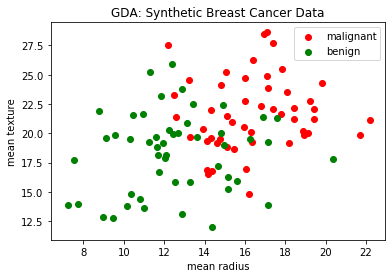

In [5]:
# Generate and plot the new fake dataset, which is balanced with 50 data points from each class (100 total).

## TO DO STARTS HERE ##

fake_class0=cancer_GDA.sample(0,50)
fake_class1=cancer_GDA.sample(1,50)

x0=np.reshape(fake_class0,(100,))[0::2]
y0=np.reshape(fake_class0,(100,))[1::2]
x1=np.reshape(fake_class1,(100,))[0::2]
y1=np.reshape(fake_class1,(100,))[1::2]

plt.scatter(x0,y0,c='r',label=cancer_data['target_names'][0])
plt.scatter(x1,y1,c='g',label=cancer_data['target_names'][1])

## TO DO ENDS HERE ##

plt.xlabel(cancer_data['feature_names'][0])
plt.ylabel(cancer_data['feature_names'][1])
plt.title('GDA: Synthetic Breast Cancer Data')
plt.legend()
plt.show()

## 2.  Bayesian Linear Regression

### Part (a)
Consider the model
$$
y_i = w^Tx_i + \epsilon_i
$$
where $\epsilon_i \sim N(0, \sigma^2)$ are i.i.d.  Our goal is to infer the weight vector $w$ given $N$ data points $\{(x_i, y_i)\}_{i=1}^N$.
Assume the prior distribution over $w$ is a multivariate Gaussian distribution $N(\nu, \Gamma)$.  


Write down the posterior distribution (up to a normalizing constant) for $w$ given the $N$ training points.

**Answer goes here**

Let C be the normalizing constant.
From the lecture we know the likelihood also follows a Multivariate Normal distribution $ Y \sim N(w^T X,\sigma^2 I)$, together with the assumption that prior is also a multivariate Normal distribution $ N(v,\Gamma)$ , we can derive the posterior distribution with the formula that computes the product of two MGD's, i.e.: $\Sigma  = ((\sigma^2 I)^{-1}+ \Gamma ^{-1})^{-1} $ and $\mu = C*(\Sigma (\sigma^2 I)^{-1}w^T X+ \Sigma \Gamma ^{-1} v ) $


### Part (b)

If we use only a single training point then we can obtain a posterior distribution $p_1(w | x_1,y_1)$.  Given a new training point we can use $p_1$ as a prior to obtain a new posterior $p_2$.  Repeat this for all the $N$ training points.  

Will the result of updating sequentially be the same as updating the prior based on all $N$ training points at once?  Give a proof.

**Answer goes here** Yes. 


$p_1=p(y_1 | x_1,w)*p(w)$ , where $p(y_1 | x_1,w)$ is gaussian due to gaussian noice.

$p_2 = p(y_2 | x_2,w) * p1$ and we can repeat this procedure until the last training point $x_N$, the resulting product will be $ p(w|X,y) = p(w) * \Pi_{i=0,1..N} p(y_i | x_i, w) $, where every term is gaussian with the same variance $\sigma ^2$. Therefore we will derive the same result as in part a.


### Part (c)

Recall that for linear regression we are minimizing a loss function
$$
L(w) = \sum_{i=1}^N (w^T x_i - y_i)^2
$$
and that this corresponds to maximizing the log-likelihood $\log p(y|X,w)$.  

1.  Show that minimizing the regularized loss function
$$
L_{\lambda}(w) = \lambda \|w\|^2 + \sum_{i=1}^N (w^T x_i - y_i)^2
$$
corresponds to finding the maximum (MAP estimator)
$$
w^* = \underset{w}{\mathrm{argmax}}\ p(w | X,y)
$$
when the prior distribution for $w$ is an isotropic Gaussian (i.e. a Gaussian of the form $N(0, \sigma^2 I)$, where $I$ is the identity matrix).  

2.  What is the relation between $\lambda$ and $\sigma^2$?

**Answer goes here**

Since the we assume the prior distribution to be an isotropic Gaussian, we can see the likelihood distribution and prior distribution are conjugates. Therefore our a posterior distribution would also be Gaussian. Therefore the MAP estimator $ w^* = \mu$ where $\mu$ is the mean of that Gaussian distribution. And since the loss function calculates the variance (with a regularizing factor added to it), the minimum is acheived when w is taken to be the mean.


### Part (d)

Now you'll implement Bayesian linear regression to fit a high degree polynomial to some noisy data.  Assume that $x_0,\ldots,x_{10}$ are equally spaced points on the interval $[0,1]$.  In other words, $x_i = i/10$ for $i=0,\ldots,10$.  We wish to approximate some underlying function $f$ with prescibed values $f_i = f(x_i)$ by using a polynomial interpolation.  Recall that we can perfectly interpolate the points using a polynomial of degree $11$ or more.  However, if there is noise in our data this will give very poor results.  In particular, we assume that we instead observe
$$
y_i = f_i + \epsilon_i
$$
where $\epsilon_i$ are iid $N(0,\gamma^2)$ random variables.  We can use a Bayesian approach to help fix this.  Here the parameter $\theta \in \mathbb{R}^{11}$ will denote the coefficients of the polynomial.
$$
\theta_0 + \theta_1 x + \cdots + \theta_{10}x^{10} = (1,x,\ldots,x^{10})^T \theta
$$
Assume the prior distribution for $\theta$ is an isotropic Gaussian of the form $N(0,\sigma^2 I)$.

Implement the two functions below which compute the MAP estimator for the parameters $\theta$ and evaluates the corresponding polynomial.  Hint: It may be useful to consider the Vandermonde matrix $V \in \mathbb{R}^{11 \times 11}$, whose entries are $V_{ij} = (x_i)^j$ for $0 \le i,j, \le 10$.  You may also want to use the Numpy linear algebra package (numpy.linalg).

In [7]:
"""
Input:
y - numpy array of shape (11,) of the observed function values y_i = f_i + epsilon_i.
gamma - positive float, standard deviation of observational noise
sigma - positive float, standard deviation of the prior

Output:
theta - numpy array of shape (11,) of the fitted parameters
"""
def fit(y, gamma, sigma):
    ## TO DO STARTS HERE ##
    V=np.ndarray(shape=(11,11))
    x=np.asarray([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    for i in range(0,11):
        for j in range(0,11):
            V[i][j]=np.power(x[i],j)
   
    V_t=np.transpose(V)
    
    A=np.matmul(V_t,V)/(gamma**2)+ np.identity(11)/(sigma**2)
    A_inv=np.linalg.inv(A)

   ## theta=np.matmul(y,np.transpose(V))
   ## theta=np.matmul(theta,A_inv)
    theta=np.matmul(A_inv,V_t)
    theta=np.matmul(theta,y)
    theta=theta/(gamma**2)
    ## TO DO ENDS HERE ##
    return theta

"""
Evaluate the polynomial with coefficients theta at the points x.

Input:
x - numpy array of shape (N, ) for N >= 1, the points to evaluate the polynomial at.
theta - numpy array of shape (11, ), the coefficients of the polynomial

theta[0] + theta[1]*x + ... + theta[9]*x^9 + theta[10]*x^10

Output:
vals - numpy array of shape (N, ), the evaluation of the polynomial at the points x.
"""
def evaluate(x, theta):
    vals = np.zeros(x.shape)
    
    ## TO DO STARTS HERE ##
    N=x.shape[0]
    
    for i in range(0,N):
        x_eval=np.zeros(shape=(11,))
        for j in range(0,11):    
            x_eval[j]=x[i]**j 
        
        vals[i]=np.inner(x_eval,theta)
    ## TO DO ENDS HERE ##
    return vals

### Part (e)

Choose an appropriate choice of $\sigma$ so that the fitted polynomial closely matches the true function $f(x) = x$.  There is not a unique answer to this problem.

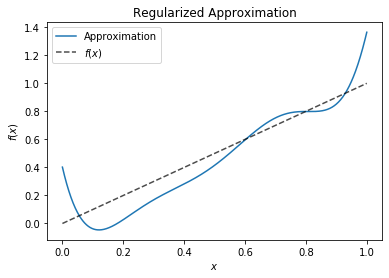

In [8]:
## TO DO STARTS HERE ##
# Choose a value of sigma.
sigma = 1500  ## surprisingly this works well. Making Sigma this big means our prior is almost uniformly distributed.
## TO DO ENDS HERE ##


# Get the noisy observations and fit the polynomial.
x = np.linspace(0, 1, 11)
gamma = 0.25
np.random.seed(1)
y = x + gamma*np.random.randn(11)

theta = fit(y, gamma = gamma, sigma = sigma)


xx = np.linspace(0,1,1000)
plt.plot(xx, evaluate(xx,theta), label = r'Approximation')
plt.plot(xx, xx, 'k--', alpha = 0.7, label = r'$f(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('Regularized Approximation')
plt.legend()
plt.show()